# M. Qasim Shafiq
## DAY 2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
## Exploring the dataset
train.head(7)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


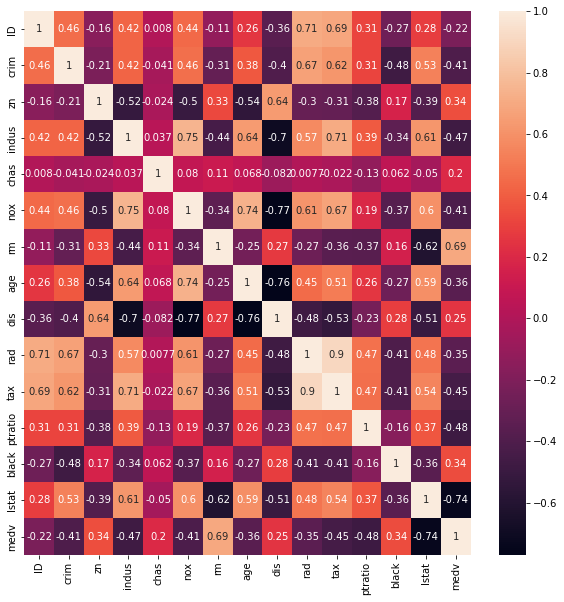

In [12]:
## Visualize features and target variable
import matplotlib.pyplot as plt
import seaborn as sns
cor = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True)
plt.show()

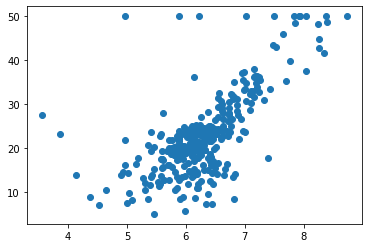

In [13]:
# rm is highly correlated with medv(target variable)
plt.scatter(train['rm'], train['medv'])
plt.show()

In [14]:
## Splitting dataset
from sklearn.model_selection import train_test_split
x = train.drop('medv',axis=1)
y = train['medv']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .8)

In [18]:
## Missing Valuesand duplicates
train.isnull().any()
#no null values

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [19]:
train.duplicated().any()
#no duplicates

False

In [15]:
## Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
imputer = IterativeImputer(random_state=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [17]:
## Evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred = ml.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)


MSE: 23.216662314887763
R2: 0.7359384739547951
